In [2]:
import numpy as np
import pandas as pd
import matplotlib  
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("train_data.csv")
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [4]:
df.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [5]:
df1= df.dropna()
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [6]:
df1.rename(columns={"Petrol (USD)" : "Petrol" }, inplace=True)
df1.head()

/tmp/ipykernel_19963/357604445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={"Petrol (USD)" : "Petrol" }, inplace=True)


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


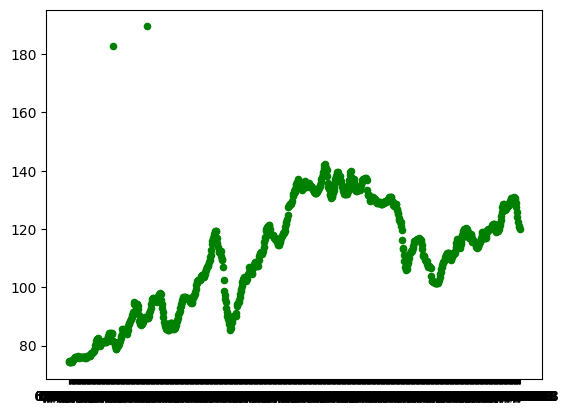

In [7]:
plt.scatter(df1.Date,df1.Petrol , color ='green',label = 'Price',s=20)

In [8]:
df2 = df1[df1.Petrol < 160]

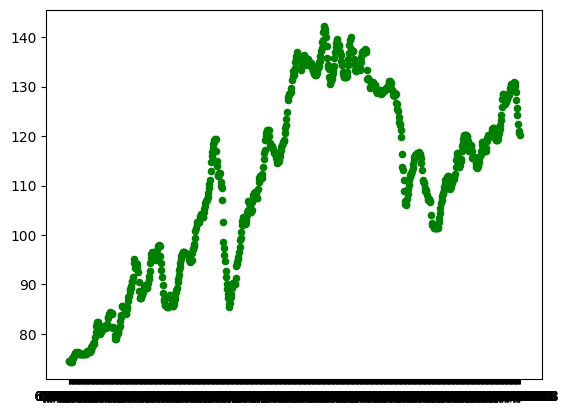

In [9]:
plt.scatter(df2.Date,df2.Petrol , color ='green',label = 'Price',s=20)

In [10]:
df3=df2.reset_index()['Petrol']
df3.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [11]:
 from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [12]:
df3

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [13]:
training = int(len(df3)*0.65)
test = len(df3)-training
trd , ted=df3[0:training,:],df3[training:len(df3),:1]

In [14]:
trd.shape

(525, 1)

In [15]:
ted.shape

(284, 1)

In [18]:
import numpy as np

def create_dataset(dataset, ts=1):
    # Initialize lists to store input features and target values
    dx, dy = [], []
    
    # Iterate over the dataset
    for i in range(len(dataset) - ts):
        # Slice the dataset to create input features
        a = dataset[i:(i + ts), 0]
        dx.append(a)
        # Append the target value
        dy.append(dataset[i + ts, 0])
    
    # Convert lists to NumPy arrays and return
    return np.array(dx), np.array(dy)


In [19]:
ts = 100
xtrain, ytrain = create_dataset(trd, ts)
xtest, ytest = create_dataset(ted, ts)

In [20]:
xtrain

array([[0.00559152, 0.00382578, 0.00309005, ..., 0.16627428, 0.16524426,
        0.1640671 ],
       [0.00382578, 0.00309005, 0.00206004, ..., 0.16524426, 0.1640671 ,
        0.16274279],
       [0.00309005, 0.00206004, 0.00103002, ..., 0.1640671 , 0.16274279,
        0.15538552],
       ...,
       [0.91597999, 0.90847557, 0.88802237, ..., 0.88655091, 0.88743378,
        0.87154208],
       [0.90847557, 0.88802237, 0.88449088, ..., 0.88743378, 0.87154208,
        0.87639788],
       [0.88802237, 0.88449088, 0.88890524, ..., 0.87154208, 0.87639788,
        0.89376104]], shape=(425, 100))

In [21]:
ytrain

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [25]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1],1)
##This reshapes the xtrain array to have three dimensions: 
# (number of samples, time steps, number of features), where the number of 
# features is set to 1, indicating a single feature per time step.



In [27]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 19.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 33.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 33.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 32.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0
  Con

In [28]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2025-03-07 06:58:36.707687: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-07 06:58:37.000740: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-07 06:58:37.141410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741330717.295786   19963 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741330717.355933   19963 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 06:58:37.700839: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [32]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.2198 - val_loss: 0.0892
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0394 - val_loss: 0.0243
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0261 - val_loss: 0.0097
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0123 - val_loss: 0.0039
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.0080 - val_loss: 0.0037
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0068 - val_loss: 0.0057
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0065 - val_loss: 0.0032
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0058 - val_loss: 0.0038
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.00

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(xtrain)
test_predict=model.predict(xtest)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [34]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
df_test=pd.read_csv("test_data.csv")
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [41]:
model.save("prtrol price prediction")


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=prtrol price prediction.